<a href="https://colab.research.google.com/github/mrFahrenhiet/ImageDenoisingDeepLearningMethods/blob/main/ImageDenoisingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import Progbar

In [ ]:
print(tf.__version__)

2.3.0


# Data Preps

In [ ]:
import logging
import time
from tqdm.notebook import tqdm

In [ ]:
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset

 99% 1.18G/1.19G [00:06<00:00, 221MB/s]
100% 1.19G/1.19G [00:06<00:00, 191MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
!unzip "/content/coronahack-chest-xraydataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0446-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack

In [ ]:
import shutil

In [ ]:
os.rename("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test", "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO")
os.rename("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train", "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/extras")

In [ ]:
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN")
os.mkdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN")

624 + 250 for training 250 for validation 100 for testing

In [ ]:
source = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/extras/"
destVal = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO"
destTest = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO"
destTrain = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO"

In [ ]:
def moveData(src,dest,nos):
  for no,i in enumerate(os.listdir(src)):
    if no==nos:
      break
    shutil.move(src+i,dest+"/"+i)

In [ ]:
moveData(source,destTrain,400)
moveData(source,destVal,300)
moveData(source,destTest,200)

In [ ]:
print(len(os.listdir(destTrain)))
print(len(os.listdir(destVal)))
print(len(os.listdir(destTest)))

1024
300
200


# Data Processing

In [ ]:
# def processData(path,noisyDataPath):
#   imgsPaths = os.listdir(path)
#   imgsPaths = [path+"/"+i for i in imgsPaths]
#   spath = noisyDataPath
#   print("Processing...")
#   out = display(progress(0, 100), display_id=True)
#   for no,p in enumerate(imgsPaths):
#     img = image.load_img(p)
#     img = image.img_to_array(img)
#     img /= 255.0
#     noiseImg = skimage.util.random_noise(img,mode='gaussian', seed=None, clip=True,var=0.155**2)
#     image.save_img(spath+"img"+str(no)+".jpeg",noiseImg)
#     out.update(progress(no, len(imgsPaths)))
#   print("Saving...")
#   out = display(progress(0, 100), display_id=True)
#   for no,src in enumerate(imgsPaths):
#     newName = path+"/"+"img"+str(no)+".jpeg"
#     os.rename(src,newName)
#     out.update(progress(no, len(imgsPaths)))

In [ ]:
def processData(path,noisyDataPath):
  imgsPaths = os.listdir(path)
  imgsPaths = [path+"/"+i for i in imgsPaths]
  spath = noisyDataPath
  print("Processing...")
  pb_i = Progbar(len(imgsPaths))
  for no,p in enumerate(imgsPaths):
    img = image.load_img(p)
    img = image.img_to_array(img)
    img /= 255.0
    noiseImg = skimage.util.random_noise(img,mode='gaussian', seed=None, clip=True,var=0.155**2)
    image.save_img(spath+"img"+str(no)+".jpeg",noiseImg)
    pb_i.add(1)
  print("Saving...")
  pb_i = Progbar(len(imgsPaths))
  for no,src in enumerate(imgsPaths):
    newName = path+"/"+"img"+str(no)+".jpeg"
    os.rename(src,newName)
    pb_i.add(1)

In [ ]:
destTrainN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/"
destValN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/"
destTestN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/"

In [ ]:
processData(destTrain,destTrainN)

Processing...
1024/1024 [==============================] - 311s 304ms/step
Saving...
1024/1024 [==============================] - 0s 29us/step


In [ ]:
processData(destVal,destValN)

Processing...
300/300 [==============================] - 88s 295ms/step
Saving...
300/300 [==============================] - 0s 40us/step


In [ ]:
processData(destTest,destTestN)

Processing...
200/200 [==============================] - 55s 273ms/step
Saving...
200/200 [==============================] - 0s 41us/step


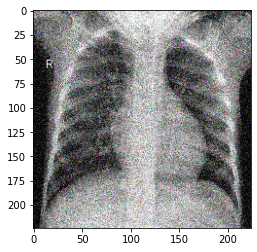

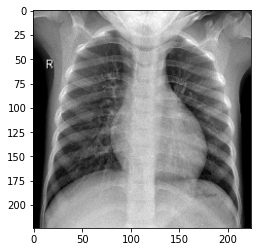

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0

img1 = image.load_img(destTrain+"/"+"img0.jpeg",target_size=(224,224))
img1 = image.img_to_array(img1)
img1 /= 255.0

plt.imshow(imgN)
plt.show()
plt.imshow(img1)
plt.show()

In [ ]:
img1.shape

(224, 224, 3)

In [ ]:
imgN.shape

(224, 224, 3)

In [ ]:
def datagen(nPath, oPath, batchSize):
  noisy = []
  original = []
  i=0
  while(i!=len(nPath)):
    for iN in range(batchSize):
      if (i+iN)>=len(nPath):
        i = 2*len(nPath)
        break
      imgN = image.load_img(nPath[i+iN],target_size=(224,224))
      imgN = image.img_to_array(imgN)
      imgN /= 255.0
      noisy.append(imgN)
      imgO = image.load_img(oPath[i+iN],target_size=(224,224))
      imgO = image.img_to_array(imgO)
      imgO /= 255.0
      original.append(imgO)
    
    if i>=len(nPath):
      break

    yield (np.array(noisy),np.array(original))
    noisy = []
    original = []
    i += batchSize

In [ ]:
trainNoisy = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN")
trainNoisy = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/"+i for i in trainNoisy]

trainOriginal = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO")
trainOriginal = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainO/"+i for i in trainOriginal]

In [ ]:
print(trainNoisy)
print(trainOriginal)

['/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img642.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img162.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img924.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img680.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img210.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img205.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img869.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img708.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img615.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img140.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/trainN/img161.jpeg'

In [ ]:
print(len(trainNoisy))
print(len(trainOriginal))

1024
1024


In [ ]:
valNoisy = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN")
valNoisy = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/"+i for i in valNoisy]

valOriginal = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO")
valOriginal = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valO/"+i for i in valOriginal]

In [ ]:
print(valNoisy)
print(valOriginal)

['/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img162.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img210.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img205.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img140.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img161.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img44.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img262.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img184.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img98.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img152.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/valN/img124.jpeg', '/content/Coronahack-C

In [ ]:
print(len(valNoisy))
print(len(valOriginal))

300
300


In [ ]:
testNoisy = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN")
testNoisy = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/"+i for i in testNoisy]

testOriginal = os.listdir("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO")
testOriginal = ["/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO/"+i for i in testOriginal]

In [ ]:
print(testNoisy)
print(testOriginal)

['/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img162.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img140.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img161.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img44.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img184.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img98.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img152.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img124.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img53.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img46.jpeg', '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img147.jpeg', '/content/Cor

In [ ]:
print(len(testNoisy))
print(len(testOriginal))

200
200


In [ ]:
trainDatagen = datagen(trainNoisy, trainOriginal, 100)

Batch 1:


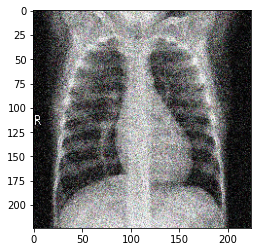

(100, 224, 224, 3)


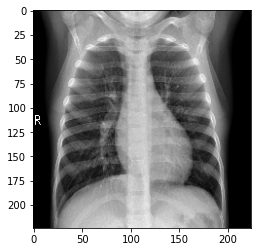

(100, 224, 224, 3)
Batch 2:


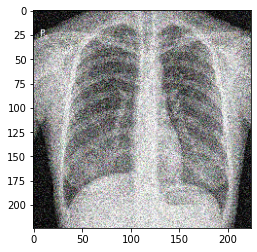

(100, 224, 224, 3)


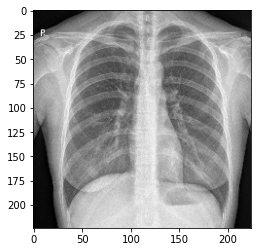

(100, 224, 224, 3)
Batch 3:


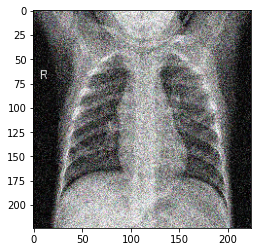

(100, 224, 224, 3)


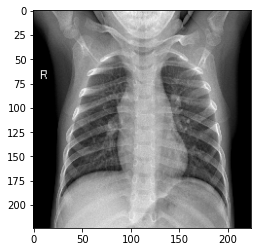

(100, 224, 224, 3)
Batch 4:


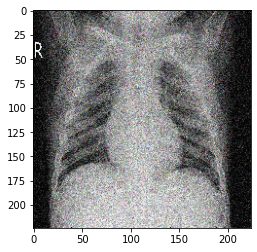

(100, 224, 224, 3)


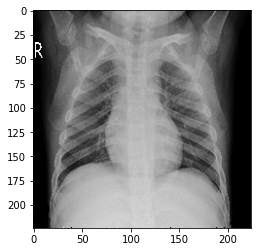

(100, 224, 224, 3)
Batch 5:


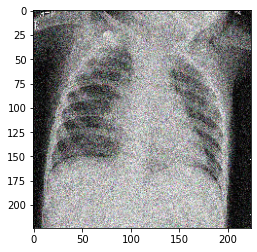

(100, 224, 224, 3)


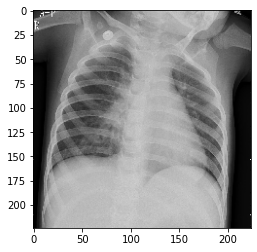

(100, 224, 224, 3)
Batch 6:


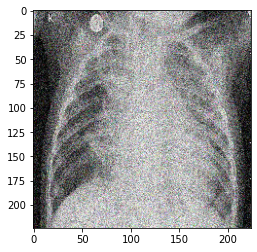

(100, 224, 224, 3)


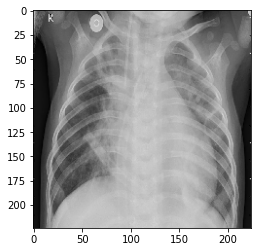

(100, 224, 224, 3)
Batch 7:


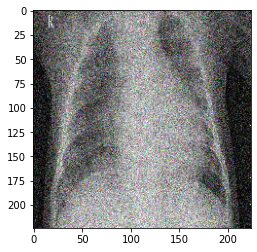

(100, 224, 224, 3)


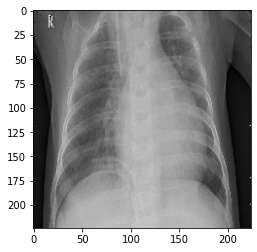

(100, 224, 224, 3)
Batch 8:


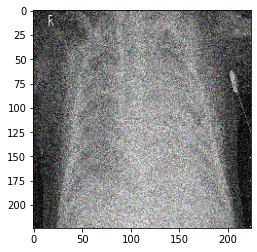

(100, 224, 224, 3)


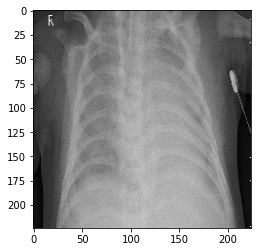

(100, 224, 224, 3)
Batch 9:


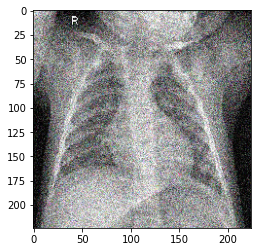

(100, 224, 224, 3)


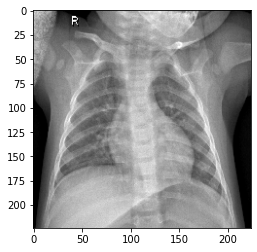

(100, 224, 224, 3)
Batch 10:


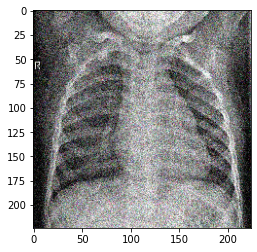

(100, 224, 224, 3)


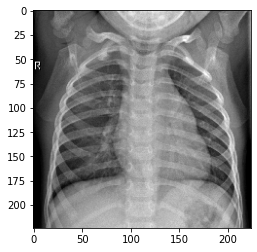

(100, 224, 224, 3)


In [ ]:
x = 1
for imgsN,imgsO in trainDatagen:
  print(f"Batch {x}:")
  plt.imshow(imgsN[0])
  plt.show()
  print(imgsN.shape)
  plt.imshow(imgsO[0])
  plt.show()
  print(imgsO.shape)
  x+=1

# Models, Training and Testing

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

In [ ]:
@tf.function()
def ssim_loss(y_true, y_pred):
  # Loss to be calculated thats why 1-ssim_val
  return 1-tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [ ]:
class SSIMMetric(tf.keras.metrics.Metric):
  def __init__(self, name='ssim_metric', **kwargs):
    super(SSIMMetric, self).__init__(name=name, **kwargs)
    self.score = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    self.score.assign(tf.reduce_mean(tf.image.ssim(y_true,y_pred,1.0)))

  def result(self):
    return self.score

In [ ]:
class PSNRMetric(tf.keras.metrics.Metric):
  def __init__(self, name='psnr_metric', **kwargs):
    super(PSNRMetric, self).__init__(name=name, **kwargs)
    self.score = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    self.score.assign(tf.image.psnr(y_true,y_pred,max_val=1.0))

  def result(self):
    return self.score

In [ ]:
@tf.function()
def ssim_metric(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true,y_pred,1.0))

In [ ]:
@tf.function()
def psnr(y,y_p):
  return tf.image.psnr(y,y_p,max_val=1.0)

In [ ]:
@tf.function()
def psnr_loss(y,y_p):
  return 100-tf.image.psnr(y,y_p,max_val=1.0)

In [ ]:
lrRonPlatue = callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3, factor=0.08)

In [ ]:
def fit(train_data,steps_per_epoch, validation_data, validation_steps):
  metrics_names = ['psnr value', 'ssim value']
  for epoch in range(epochs):
    trainData = datagen(trainNoisy,trainOriginal,train_batch)
    valData = datagen(valNoisy,valOriginal,batchSize=val_batch)
    print(f"Epoch: {epoch}:\n")
    pb_i = Progbar(len(trainNoisy), stateful_metrics=metrics_names)
    for step, (xbatch,ybatch) in enumerate(trainData):
      with tf.GradientTape() as tape:
        y_p = modelN(xbatch, training=True)
        lossVal = ssim_loss(ybatch, y_p)
      gradients = tape.gradient(lossVal, modelN.trainable_weights)
      adam.apply_gradients(zip(gradients, modelN.trainable_weights))
      psnrMet.update_state(ybatch[step], y_p[step])
      ssimMet.update_state(ybatch[step],y_p[step])
      values=[('psnr value',psnrMet.result()), ('ssim value',ssimMet.result())]
      pb_i.add(train_batch, values=values)
    psnrVal = psnrMet.result()
    ssimVal = ssimMet.result()
    print(f"SSIM Loss: {lossVal}; SSIM Score: {ssimVal}; PSNR Score: {psnrVal}\t")
    psnrMet.reset_states()
    ssimMet.reset_states()
    for step, (xbatch, ybatch) in enumerate(valData):
      ypV = modelN(xbatch, training=True)
      lossVal = ssim_loss(ybatch, ypV)
      psnrMet.update_state(ybatch[step], ypV[step])
      ssimMet.update_state(ybatch[step],y_p[step])
    psnrVal = psnrMet.result()
    ssimVal = ssimMet.result()
    print(f" Validation:: SSIM Loss: {lossVal}; SSIM Score: {ssimVal}; PSNR Score: {psnrVal}\n")
    psnrMet.reset_states()
    ssimMet.reset_states()

def evaluate(testDataGen, stepsPerEpoch):
  for step, (xbatch, ybatch) in enumerate(testDataGen):
    ypV = modelN(xbatch, training=True)
    lossVal = ssim_loss(ybatch, ypV)
    psnrMet.update_state(ybatch[step], ypV[step])
    ssimMet.update_state(ybatch[step],y_p[step])
  psnrVal = psnrMet.result()
  ssimVal = ssimMet.result()
  print(f"Loss: {lossVal}; SSIM Score: {ssimVal}; PSNR Score: {psnrVal}\n")
  psnrMet.reset_states()
  ssimMet.reset_states()

In [ ]:
# ConvLayer
class ConvLayer(layers.Layer):
  def __init__(self, out_channels, kernel_size=3):
    super(ConvLayer, self).__init__()
    self.conv = layers.Conv2D(out_channels, kernel_size, padding='same')
    self.bn = layers.BatchNormalization()
  
  def call(self, input_tensor, training=False):
    c = self.conv(input_tensor)
    c = self.bn(c,training=training)
    c = tf.nn.relu(c)
    return c

## Gondara et al 2016

In [ ]:
class Encoder(layers.Layer):
  def __init__(self):
    super(Encoder,self).__init__()
    self.conv1 = layers.Conv2D(64,(3,3),activation='relu',padding='same', name="Conv1")
    self.conv2 = layers.Conv2D(64,(3,3),activation='relu',padding='same', name="Conv2")
    self.maxpool = layers.MaxPooling2D((2,2), padding='same', name="Pool1")
  
  def call(self, input_tensor, training=False):
    x = self.conv1(input_tensor, training=training)
    x = self.maxpool(x)
    x = self.conv2(x, training=training)
    x = self.maxpool(x)
    return x


class Decoder(layers.Layer):
  def __init__(self):
    super(Decoder,self).__init__()
    self.conv1 = layers.Conv2D(64,(3,3),activation='relu',padding='same', name="Conv1")
    self.conv2 = layers.Conv2D(64,(3,3),activation='relu',padding='same', name="Conv2")
    self.upSample = layers.UpSampling2D((2,2),name="UpSample")
    self.identityMapping = layers.Conv2D(3,(3,3),activation='sigmoid',padding='same', name="Identity_Mapping")
  
  def call(self, input_tensor, training=False):
    x = self.conv1(input_tensor, training=training)
    x = self.upSample(x)
    x = self.conv2(x, training=training)
    x = self.upSample(x)
    x = self.identityMapping(x)
    return x


class DenoisingAutoEncoder(tf.keras.Model):
  def __init__(self):
    super(DenoisingAutoEncoder, self).__init__()
    self.encoder = Encoder()
    self.decoder = Decoder()

  def call(self, input_tensor, training=False):
    x = self.encoder(input_tensor)
    x = self.decoder(x)
    return x
  
  def model(self):
    inp = layers.Input(shape=(224,224,3))
    return tf.keras.Model(inputs=inp, outputs=self.call(inp))

In [ ]:
gondara16 = DenoisingAutoEncoder()

### Training

In [ ]:
train_batches = 64
val_batches = 32
epochs = 25

In [ ]:
steps = (len(trainNoisy))//train_batches

In [ ]:
valStep = (len(valNoisy))//val_batches

In [ ]:
gondara16.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss=ssim_loss,metrics=[ssim_metric,psnr,'mse'])

In [ ]:
train_psnr = []
val_psnr =[]
train_ssim = []
val_ssim = []
for i in range(epochs):
  print(f"Epochs: {i}/{epochs}")
  trainData = datagen(trainNoisy,trainOriginal,train_batches)
  valData = datagen(valNoisy,valOriginal,batchSize=val_batches)
  hist = gondara16.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep,callbacks=[lrRonPlatue])
  train_psnr.append(hist.history['psnr'])
  val_psnr.append(hist.history['val_psnr'])
  train_ssim.append(hist.history['ssim_metric'])
  val_ssim.append(hist.history['val_ssim_metric'])

Epochs: 0/25
16/16 [==============================] - 55s 3s/step - loss: 0.4857 - ssim_metric: 0.5143 - psnr: 12.2176 - mse: 0.0629 - val_loss: 0.4628 - val_ssim_metric: 0.5372 - val_psnr: 12.3054 - val_mse: 0.0621
Epochs: 1/25
16/16 [==============================] - 55s 3s/step - loss: 0.4348 - ssim_metric: 0.5652 - psnr: 13.0920 - mse: 0.0522 - val_loss: 0.3963 - val_ssim_metric: 0.6037 - val_psnr: 14.2396 - val_mse: 0.0401
Epochs: 2/25
16/16 [==============================] - 55s 3s/step - loss: 0.3601 - ssim_metric: 0.6399 - psnr: 15.6017 - mse: 0.0302 - val_loss: 0.3331 - val_ssim_metric: 0.6669 - val_psnr: 17.5090 - val_mse: 0.0195
Epochs: 3/25
16/16 [==============================] - 55s 3s/step - loss: 0.3171 - ssim_metric: 0.6829 - psnr: 18.8788 - mse: 0.0146 - val_loss: 0.3055 - val_ssim_metric: 0.6945 - val_psnr: 20.4352 - val_mse: 0.0100
Epochs: 4/25
16/16 [==============================] - 55s 3s/step - loss: 0.2916 - ssim_metric: 0.7084 - psnr: 21.6413 - mse: 0.0076 - v

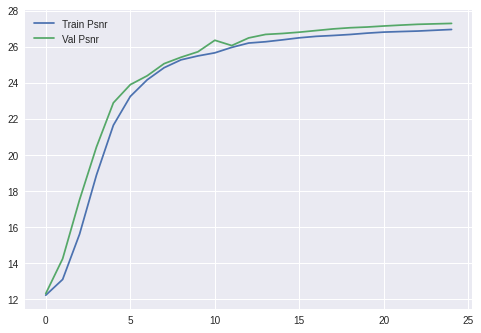

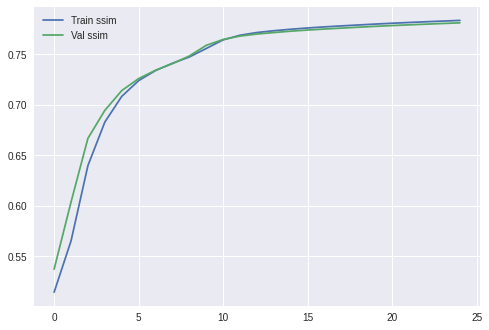

In [ ]:
plt.style.use('seaborn')
plt.plot(train_psnr,label="Train Psnr")
plt.plot(val_psnr, label="Val Psnr")
plt.legend()
plt.show()
plt.plot(train_ssim,label="Train ssim")
plt.plot(val_ssim, label="Val ssim")
plt.legend()
plt.show()

### Testing

In [ ]:
gondara16.evaluate(datagen(testNoisy,testOriginal,batchSize=4),steps=25)

25/25 [==============================] - 4s 155ms/step - loss: 0.2175 - ssim_metric: 0.7825 - psnr: 27.2762 - mse: 0.0020


[0.21749895811080933,
 0.7825009822845459,
 27.276174545288086,
 0.002031797543168068]

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0
imgN = np.expand_dims(imgN,axis=0)

In [ ]:
imgP1 = gondara16.predict(imgN)

In [ ]:
img0 = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO/img0.jpeg",target_size=(224,224))
img0 = image.img_to_array(img0)
img0 /= 255.0

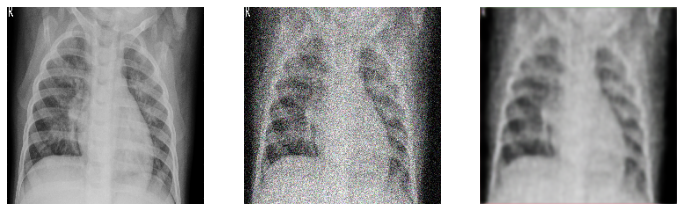

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(img0)
axs[2].imshow(imgP1[0])
axs[1].imshow(imgN[0])

## DNCNN 2017

In [ ]:
class Dcnn(tf.keras.Model):
  def __init__(self, nos_convLy):
    super(Dcnn, self).__init__()
    self.conv1 = layers.Conv2D(64,(3,3),padding='same',activation='relu')
    self.convBlocks = [ConvLayer(64) for i in range(nos_convLy)]
    self.conv2 = layers.Conv2D(1,(3,3),(1,1),padding='same')
  
  def call(self, input_tensor, training=False):
    x = self.conv1(input_tensor,training=training)
    for i in range(len(self.convBlocks)):
      x = self.convBlocks[i](x, training=training)
    x = self.conv2(x,training=training)
    res = input_tensor - x
    return res


In [ ]:
train_batch_size = 32
val_batch_size = 16
epochs = 50 # with 100 epochs we can get the best image

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.002)

In [ ]:
dcnn = Dcnn(15)
dcnn.compile(optimizer=opt,loss=ssim_loss,metrics=[ssim_metric,psnr,'mse'])

### Training

In [ ]:
steps = (len(trainNoisy))//train_batch_size

In [ ]:
valStep = (len(valNoisy))//val_batch_size

In [ ]:
train_psnr = []
val_psnr =[]
train_ssim = []
val_ssim = []
for i in range(epochs):
  print(f"Epochs: {i}/{epochs}")
  trainData = datagen(trainNoisy,trainOriginal,train_batch_size)
  valData = datagen(valNoisy,valOriginal,batchSize=val_batch_size)
  hist = dcnn.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep)
  train_psnr.append(hist.history['psnr'])
  val_psnr.append(hist.history['val_psnr'])
  train_ssim.append(hist.history['ssim_metric'])
  val_ssim.append(hist.history['val_ssim_metric'])

Epochs: 0/50
32/32 [==============================] - 77s 2s/step - loss: 0.8069 - ssim_metric: 0.1931 - psnr: 11.6882 - mse: 0.2993 - val_loss: 0.9882 - val_ssim_metric: 0.0118 - val_psnr: -12.8880 - val_mse: 20.7057
Epochs: 1/50
32/32 [==============================] - 83s 3s/step - loss: 0.7677 - ssim_metric: 0.2323 - psnr: 14.5523 - mse: 0.0364 - val_loss: 0.8078 - val_ssim_metric: 0.1922 - val_psnr: 5.6335 - val_mse: 0.2836
Epochs: 2/50
32/32 [==============================] - 83s 3s/step - loss: 0.7599 - ssim_metric: 0.2401 - psnr: 13.8708 - mse: 0.0435 - val_loss: 0.7697 - val_ssim_metric: 0.2303 - val_psnr: 14.0554 - val_mse: 0.0402
Epochs: 3/50
32/32 [==============================] - 83s 3s/step - loss: 0.7587 - ssim_metric: 0.2413 - psnr: 14.4888 - mse: 0.0368 - val_loss: 0.7673 - val_ssim_metric: 0.2327 - val_psnr: 14.1756 - val_mse: 0.0388
Epochs: 4/50
32/32 [==============================] - 83s 3s/step - loss: 0.7578 - ssim_metric: 0.2422 - psnr: 14.2306 - mse: 0.0393 - 

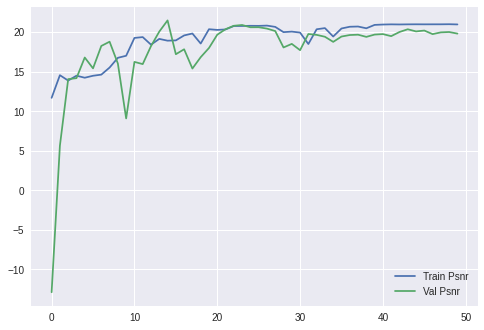

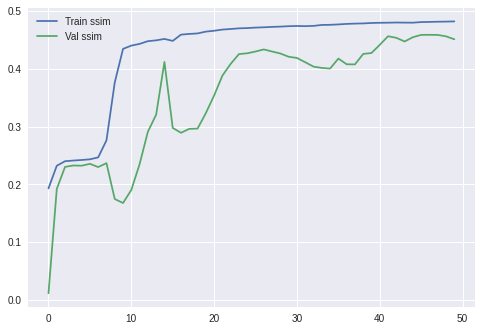

In [ ]:
plt.style.use('seaborn')
plt.plot(train_psnr,label="Train Psnr")
plt.plot(val_psnr, label="Val Psnr")
plt.legend()
plt.show()
plt.plot(train_ssim,label="Train ssim")
plt.plot(val_ssim, label="Val ssim")
plt.legend()
plt.show()

### Testing

In [ ]:
dcnn.evaluate(datagen(testNoisy,testOriginal,batchSize=4),steps=25)

25/25 [==============================] - 3s 139ms/step - loss: 0.5469 - ssim_metric: 0.4531 - psnr: 19.6756 - mse: 0.0109


[0.5469142198562622,
 0.4530857801437378,
 19.675613403320312,
 0.010885586962103844]

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0
imgN = np.expand_dims(imgN,axis=0)

In [ ]:
imgP1 = dcnn.predict(imgN)

In [ ]:
img0 = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO/img0.jpeg",target_size=(224,224))
img0 = image.img_to_array(img0)
img0 /= 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


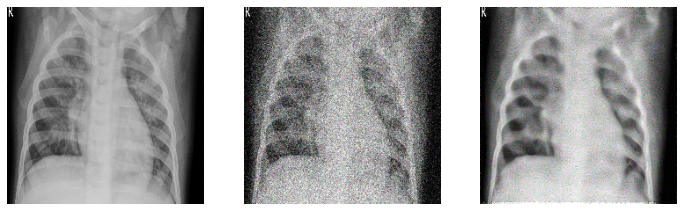

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(img0)
axs[2].imshow(imgP1[0])
axs[1].imshow(imgN[0])

## Vincent et al

In [ ]:
filters = (32,64)
latDims = 16

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
class ConvTransposeLayer(layers.Layer):
  def __init__(self, nosFilter, strides = 1):
    super(ConvTransposeLayer, self).__init__()
    self.convTrans1 = layers.Conv2DTranspose(nosFilter,(3,3),strides=strides,padding='same')
    self.leakRel = layers.LeakyReLU(alpha=0.2)
    self.batchNorm = layers.BatchNormalization(axis=-1)
  def call(self, input_tensor, training=False):
    x = self.convTrans1(input_tensor)
    x = self.leakRel(x)
    x = self.batchNorm(x)
    return x

In [ ]:
# Encoder
class Vincent(tf.keras.Model):
  def __init__(self):
    super(Vincent, self).__init__()
    self.convBlock1 = ConvLayer(32)
    self.convBlock2 = ConvLayer(64)
    self.flattern = layers.Flatten()
    self.dense1 = layers.Dense(latDims)
    self.convTransBlock1 = ConvTransposeLayer(64,2)
    self.convTransBlock2 = ConvTransposeLayer(32,2)
    self.convTrans = layers.Conv2DTranspose(3,(3, 3), padding="same")

  
  def call(self, input_tensor, training=False):
    v = self.convBlock1(input_tensor)
    v = self.convBlock2(v)
    vol_size = K.int_shape(v)
    v = self.flattern(v)
    lat = self.dense1(v)
    lat = layers.Dense(np.prod(vol_size[1:]))(lat)
    v = layers.Reshape((vol_size[1],vol_size[2],vol_size[3]))(lat)
    v = self.convTransBlock1(v)
    v = self.convTransBlock2(v)
    v = self.convTrans(v)
    res = layers.Activation('sigmoid')(v)
    return res

inp = layers.Input(shape=(224,224,3))
v = inp
for f in filters:
  v = ConvLayer(f)(v)
volSize = K.int_shape(v)
v = layers.Flatten()(v)
lat = layers.Dense(latDims)(v)
encoder = tf.keras.Model(inputs=inp, outputs=lat, name="Encoder")

# Decoder
latIn = layers.Input(shape=(latDims,))
v = layers.Dense(np.prod(volSize[1:]))(latIn)
v = layers.Reshape((volSize[1],volSize[2],volSize[3]))(v)
for f in filters[::-1]:
  v = ConvTransposeLayer(f)(v)
v =layers.Conv2DTranspose(3,(3, 3), padding="same")(v)
out = layers.Activation('sigmoid')(v)
decoder = tf.keras.Model(inputs=latIn, outputs=out, name='Decoder')

# Main
vincent8 = tf.keras.Model(inputs=inp, outputs=decoder(encoder(inp)),name="Vincent8Model")

vincent8.summary()

Model: "Vincent8Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
Encoder (Functional)         (None, 16)                51400016  
_________________________________________________________________
Decoder (Functional)         (None, 224, 224, 3)       54648131  
Total params: 106,048,147
Trainable params: 106,047,763
Non-trainable params: 384
_________________________________________________________________


In [ ]:
# vincent8 = Vincent()

In [ ]:
vincent8.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss=ssim_loss,metrics=[ssim_metric, psnr,'mse'])

### Training

In [ ]:
train_batch_size = 16
val_batch_size = 8
epochs = 25

In [ ]:
steps = (len(trainNoisy))//train_batch_size

In [ ]:
valStep = (len(valNoisy))//val_batch_size

In [ ]:
train_psnr = []
val_psnr =[]
train_ssim = []
val_ssim = []
for i in range(epochs):
  trainData = datagen(trainNoisy,trainOriginal,train_batch_size)
  valData = datagen(valNoisy,valOriginal,batchSize=16)
  print(f"Epoch {i}/{epochs}")
  hist = vincent8.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep,callbacks=[lrRonPlatue])
  train_psnr.append(hist.history['psnr'])
  val_psnr.append(hist.history['val_psnr'])
  train_ssim.append(hist.history['ssim_metric'])
  val_ssim.append(hist.history['val_ssim_metric'])

Epoch 0/25
64/64 [==============================] - 51s 799ms/step - loss: 0.5657 - ssim_metric: 0.4343 - psnr: 14.2823 - mse: 0.0434 - val_loss: 0.5772 - val_ssim_metric: 0.4228 - val_psnr: 13.0150 - val_mse: 0.0564
Epoch 1/25
64/64 [==============================] - 51s 798ms/step - loss: 0.4810 - ssim_metric: 0.5190 - psnr: 16.5127 - mse: 0.0251 - val_loss: 0.5101 - val_ssim_metric: 0.4899 - val_psnr: 14.8761 - val_mse: 0.0368
Epoch 2/25
64/64 [==============================] - 53s 822ms/step - loss: 0.4735 - ssim_metric: 0.5265 - psnr: 16.6755 - mse: 0.0241 - val_loss: 0.5359 - val_ssim_metric: 0.4641 - val_psnr: 13.0533 - val_mse: 0.0525
Epoch 3/25
64/64 [==============================] - 52s 807ms/step - loss: 0.4692 - ssim_metric: 0.5308 - psnr: 16.6756 - mse: 0.0241 - val_loss: 0.5497 - val_ssim_metric: 0.4503 - val_psnr: 12.3298 - val_mse: 0.0610
Epoch 4/25
64/64 [==============================] - 52s 811ms/step - loss: 0.4563 - ssim_metric: 0.5437 - psnr: 17.0671 - mse: 0.021

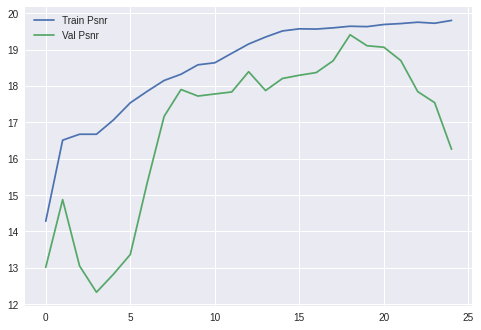

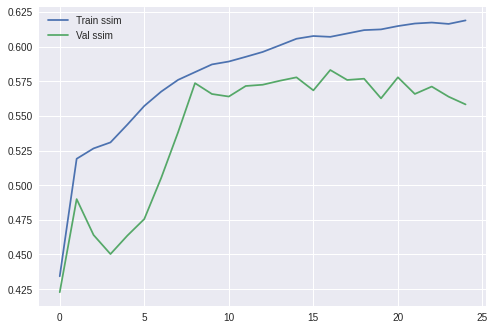

In [ ]:
plt.style.use('seaborn')
plt.plot(train_psnr,label="Train Psnr")
plt.plot(val_psnr, label="Val Psnr")
plt.legend()
plt.show()
plt.plot(train_ssim,label="Train ssim")
plt.plot(val_ssim, label="Val ssim")
plt.legend()
plt.show()

### Testing

In [ ]:
vincent8.evaluate(datagen(testNoisy,testOriginal,batchSize=4),steps=25)

25/25 [==============================] - 3s 137ms/step - loss: 0.4409 - ssim_metric: 0.5591 - psnr: 16.3058 - mse: 0.0262


[0.44093838334083557,
 0.5590616464614868,
 16.305849075317383,
 0.0261616799980402]

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0
imgN = np.expand_dims(imgN,axis=0)

In [ ]:
imgP2 = vincent8.predict(imgN)

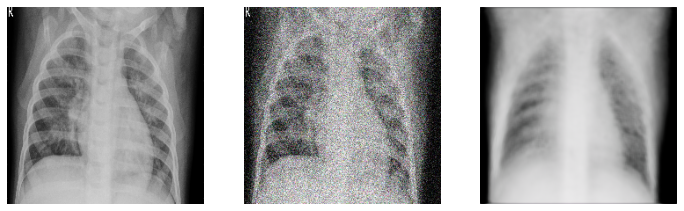

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(img0)
axs[2].imshow(imgP2[0])
axs[1].imshow(imgN[0])

## Ding Liu et al.

In [ ]:
class ResBlock(layers.Layer):
  def __init__(self, channels):
    super(ResBlock, self).__init__()
    self.conv1 = ConvLayer(channels[0],3)
    self.conv2 = ConvLayer(channels[1],1)
    self.conv3 = ConvLayer(channels[2],3)
    self.conv4 = ConvLayer(channels[3],1)
  
  def call(self, input_tensor, training=False):
    c1 = self.conv1(input_tensor)
    c2 = self.conv2(c1, training=training)
    c3 = self.conv3(c2, training=training)
    c4 = self.conv4(c3, training=training)
    res = c4+c1
    return res

In [ ]:
# Main Model
class DenoisingNet(tf.keras.Model):
  def __init__(self):
    super(DenoisingNet, self).__init__()
    self.encode1 = ResBlock([128,32,32,128])
    self.encode2 = ResBlock([128,32,32,128])
    self.encode3 = ResBlock([128,32,32,128])
    self.downSample = layers.MaxPool2D()
    self.decode1 = ResBlock([256,64,64,256])
    self.decode2 = ResBlock([256,64,64,256])
    self.upSample = layers.UpSampling2D()
    self.identityMapping = layers.Conv2D(3,1)
  
  def call(self, input_tensor, training=False):
    e1 = self.encode1(input_tensor)
    d1 = self.downSample(e1)
    e2 = self.encode2(d1)
    d2 = self.downSample(e2)
    e3 = self.encode3(d2)
    u1 = self.upSample(e3)
    f1 = layers.Concatenate(axis=-1)([u1,e2])
    d1 = self.decode1(f1)
    u2 = self.upSample(d1)
    f2 = layers.Concatenate(axis=-1)([u2,e1])
    d2 = self.decode2(f2)
    im = self.identityMapping(d2)
    res =  input_tensor + im
    return res

  def model(self):
    x = layers.Input(shape=(224,224,3))
    return tf.keras.Model(inputs=[x], outputs=self.call(x))
  

In [ ]:
main = DenoisingNet()
sgd = tf.keras.optimizers.SGD(lr = 1e-4)
main.compile(optimizer=sgd, loss='mse', metrics=[ssim_loss, psnr])
trainData = datagen(trainNoisy,trainOriginal,8)
valData = datagen(valNoisy,valOriginal,batchSize=4)
valStep = (len(valNoisy))//8
steps = (len(trainNoisy))//16
hist = main.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep, epochs=1)
print(main.model().summary())

64/64 [==============================] - 56s 868ms/step - loss: 1.5993 - ssim_loss: 0.9968 - psnr: -1.9634 - val_loss: 0.1399 - val_ssim_loss: 0.9272 - val_psnr: 8.5610
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
res_block (ResBlock)            (None, 224, 224, 128 22464       input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    multiple             0           res_block[0][0]                  
                                                                 res_block_1[0][0]                
_________________

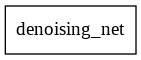

In [ ]:
tf.keras.utils.plot_model(
    main, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

### Training

In [ ]:
train_batch_size = 8
val_batch_size = 4
EPOCHS = 25

In [ ]:
main.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss=ssim_loss, metrics=[ssim_metric, psnr,'mse'])

In [ ]:
steps = (len(trainNoisy))//train_batch_size

In [ ]:
valStep = (len(valNoisy))//val_batch_size

In [ ]:
train_psnr = []
val_psnr =[]
train_ssim = []
val_ssim = []
for i in range(EPOCHS):
  print(f"Epoch {i}/{EPOCHS}")
  trainData = datagen(trainNoisy,trainOriginal,train_batch_size)
  valData = datagen(valNoisy,valOriginal,batchSize=val_batch_size)
  hist = main.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep)
  train_psnr.append(hist.history['psnr'])
  val_psnr.append(hist.history['val_psnr'])
  train_ssim.append(hist.history['ssim_metric'])
  val_ssim.append(hist.history['val_ssim_metric'])

Epoch 0/25
128/128 [==============================] - 108s 843ms/step - loss: 0.3741 - ssim_metric: 0.6259 - psnr: 10.1382 - mse: 3.8686 - val_loss: 0.7513 - val_ssim_metric: 0.2487 - val_psnr: 19.1471 - val_mse: 0.0122
Epoch 1/25
128/128 [==============================] - 107s 836ms/step - loss: 0.2678 - ssim_metric: 0.7322 - psnr: 6.2967 - mse: 19.9460 - val_loss: 0.7677 - val_ssim_metric: 0.2323 - val_psnr: 18.5975 - val_mse: 0.0139
Epoch 2/25
128/128 [==============================] - 107s 836ms/step - loss: 0.2387 - ssim_metric: 0.7613 - psnr: 8.8841 - mse: 27.4254 - val_loss: 0.7710 - val_ssim_metric: 0.2290 - val_psnr: 18.6841 - val_mse: 0.0136
Epoch 3/25
128/128 [==============================] - 107s 835ms/step - loss: 0.2230 - ssim_metric: 0.7770 - psnr: 15.3683 - mse: 5.6466 - val_loss: 0.4245 - val_ssim_metric: 0.5755 - val_psnr: 24.1241 - val_mse: 0.0039
Epoch 4/25
128/128 [==============================] - 107s 834ms/step - loss: 0.2301 - ssim_metric: 0.7699 - psnr: 13.72

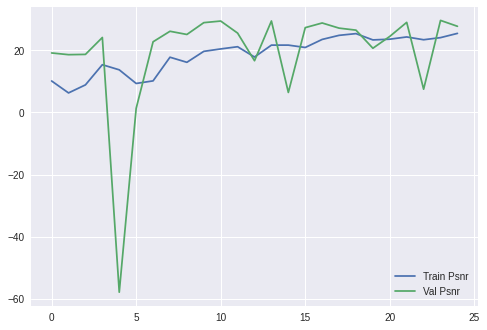

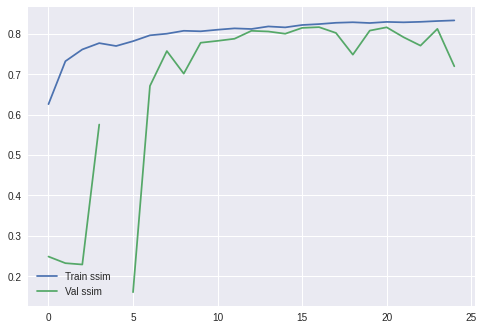

In [ ]:
plt.style.use('seaborn')
plt.plot(train_psnr,label="Train Psnr")
plt.plot(val_psnr, label="Val Psnr")
plt.legend()
plt.show()
plt.plot(train_ssim,label="Train ssim")
plt.plot(val_ssim, label="Val ssim")
plt.legend()
plt.show()

### Testing

In [ ]:
main.evaluate(datagen(testNoisy,testOriginal,batchSize=4),steps=25)

25/25 [==============================] - 4s 165ms/step - loss: 0.2755 - ssim_metric: 0.7245 - psnr: 27.7259 - mse: 0.0017


[0.27554285526275635,
 0.7244571447372437,
 27.72588348388672,
 0.001700676861219108]

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0
imgN = np.expand_dims(imgN,axis=0)

In [ ]:
imgP1 = main.predict(imgN)

In [ ]:
img0 = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO/img0.jpeg",target_size=(224,224))
img0 = image.img_to_array(img0)
img0 /= 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


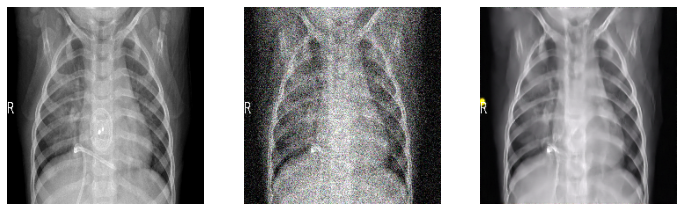

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(img0)
axs[2].imshow(imgP1[0])
axs[1].imshow(imgN[0])

## Residual Dense Network for Image Restoration

In [ ]:
class BaseConv(layers.Layer):
  def __init__(self, filters=96, kernel_size=3, strides=1, padding='same', alpha=0.2):
    super(BaseConv, self).__init__()
    self.conv = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
    self.batchNorm = layers.BatchNormalization()
    self.leakyRelu = layers.LeakyReLU(alpha=alpha)
  
  def call(self, input_tensor, training=False):
    x = self.conv(input_tensor,training=training)
    x = self.batchNorm(x)
    x = self.leakyRelu(x)
    return x


In [ ]:
class DenseBlock(layers.Layer):
  def __init__(self, filters=96, k=3):
    super(DenseBlock, self).__init__()
    self.k = k
    self.convBlocks = [BaseConv(filters=filters, kernel_size=3) for i in range(k)]
    self.convBase2 = BaseConv(filters=filters*4, kernel_size=1)
    self.batchNorm = layers.BatchNormalization()
    self.leakyRelu = layers.LeakyReLU(alpha=0.2)
    self.convBase3 = BaseConv(filters=filters, kernel_size=3)
  
  def call(self, input_tensor, training=False):
    x_temp1 = self.convBlocks[0](input_tensor, training=training)
    x = layers.Concatenate(axis=-1)([input_tensor, x_temp1])
    for i in range(1,self.k):
      x_temp2 = self.convBlocks[i](x, training=training)
      x = layers.Concatenate(axis=-1)([x, x_temp2])
    
    # if self.k>3:
    #   x = self.batchNorm(x)
    #   x = self.leakyRelu(x)
    #   x = self.convBase2(x, training=training)
    
    x = self.convBase3(x, training=training)
    return x


In [ ]:
class ResDenseBlock(layers.Layer):
  def __init__(self, filters=96, kr=3):
    super(ResDenseBlock, self).__init__()
    self.denseBlock = DenseBlock(filters=filters, k=kr)
    self.convBase = BaseConv(filters=filters, kernel_size=3)
  
  def call(self, input_tensor, training=False):
    x = self.denseBlock(input_tensor)
    x = layers.Concatenate(axis=-1)([input_tensor,x])
    x = self.convBase(x)
    x = layers.Add()([input_tensor, x])
    return x

In [ ]:
def mainModel(inputs,ks=3, kr=3, filters=96):
  resb = []
  x = BaseConv(filters=filters, kernel_size=3)(inputs)
  z = BaseConv(filters=filters, kernel_size=3)(x)
  resb.append(z)
  for i in range(ks):
      resb.append(ResDenseBlock(kr=kr, filters=filters)(resb[i]))

  resb = resb[1:]
  concat = layers.Concatenate(axis=-1)(resb)
  
  y = BaseConv(filters=filters, kernel_size=1)(concat)
  y = BaseConv(filters=filters, kernel_size=3)(y)
  # y = layers.MaxPool2D()(y)
  # y = layers.Conv2DTranspose(filters=filters, kernel_size=3, strides=2, padding='same')(y)
  
  y = layers.Add()([y, x])
  # y = layers.Conv2DTranspose(filters=filters, kernel_size=3, strides=2, padding='same')(y)
  
  outputs = BaseConv(filters=3, kernel_size=3, alpha=0.0)(y)
  outputs = layers.Add()([inputs, outputs])
  return outputs

In [ ]:
inputs = layers.Input(shape=(224,224,3))
resDesModel = tf.keras.Model(inputs=inputs, outputs=mainModel(inputs,ks=3,kr=3,filters=64))
resDesModel.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
base_conv (BaseConv)            (None, 224, 224, 64) 2048        input_5[0][0]                    
__________________________________________________________________________________________________
base_conv_1 (BaseConv)          (None, 224, 224, 64) 37184       base_conv[0][0]                  
__________________________________________________________________________________________________
res_dense_block (ResDenseBlock) (None, 224, 224, 64) 443968      base_conv_1[0][0]                
_______________________________________________________________________________________

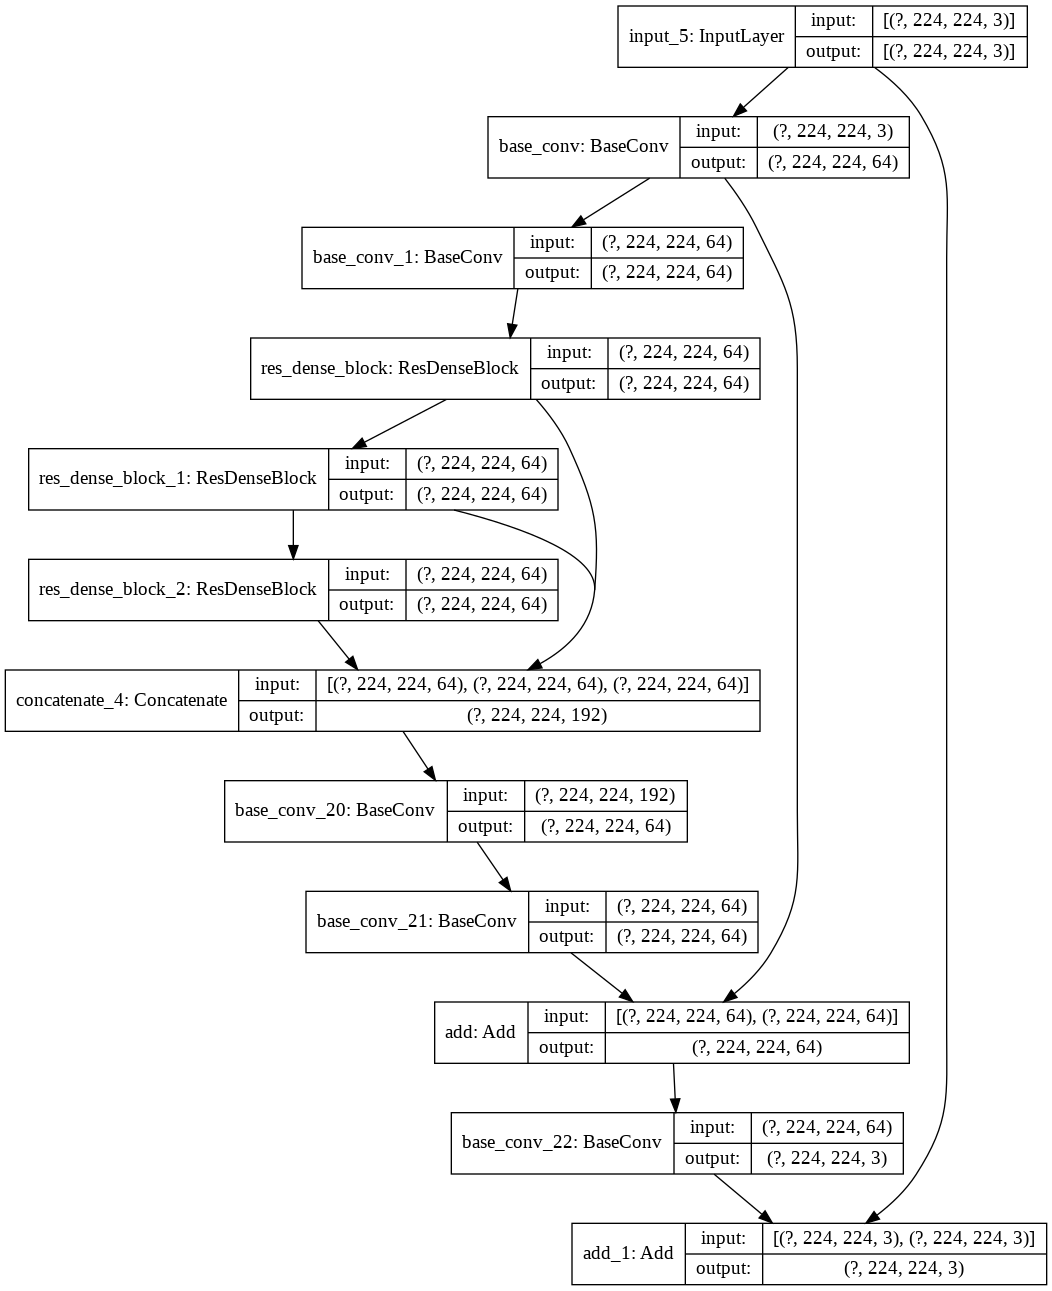

In [ ]:
tf.keras.utils.plot_model(
    resDesModel, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

In [ ]:
resDesModel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.02),loss=ssim_loss,metrics=[ssim_metric, psnr,'mse'])

### Training

In [ ]:
train_batch_size = 8
val_batch_size = 4
epochs = 30

In [ ]:
steps = (len(trainNoisy))//train_batch_size

In [ ]:
valStep = (len(valNoisy))//val_batch_size

In [ ]:
train_psnr = []
val_psnr =[]
train_ssim = []
val_ssim = []
for i in range(epochs):
  trainData = datagen(trainNoisy,trainOriginal,train_batch_size)
  valData = datagen(valNoisy,valOriginal,batchSize=val_batch_size)
  print(f"Epoch {i}")
  hist = resDesModel.fit(trainData,steps_per_epoch=steps, validation_data=valData, validation_steps=valStep)
  train_psnr.append(hist.history['psnr'])
  val_psnr.append(hist.history['val_psnr'])
  train_ssim.append(hist.history['ssim_metric'])
  val_ssim.append(hist.history['val_ssim_metric'])

Epoch 0
128/128 [==============================] - 159s 1s/step - loss: 0.4029 - ssim_metric: 0.5971 - psnr: 13.0593 - mse: 0.0557 - val_loss: 0.6551 - val_ssim_metric: 0.3449 - val_psnr: 10.1802 - val_mse: 0.0974
Epoch 1
128/128 [==============================] - 157s 1s/step - loss: 0.3418 - ssim_metric: 0.6582 - psnr: 13.2624 - mse: 0.0476 - val_loss: 0.3996 - val_ssim_metric: 0.6004 - val_psnr: 12.0549 - val_mse: 0.0624
Epoch 2
128/128 [==============================] - 157s 1s/step - loss: 0.3323 - ssim_metric: 0.6677 - psnr: 13.1907 - mse: 0.0483 - val_loss: 0.3744 - val_ssim_metric: 0.6256 - val_psnr: 14.7420 - val_mse: 0.0336
Epoch 3
128/128 [==============================] - 157s 1s/step - loss: 0.3278 - ssim_metric: 0.6722 - psnr: 13.1550 - mse: 0.0487 - val_loss: 0.4066 - val_ssim_metric: 0.5934 - val_psnr: 13.8246 - val_mse: 0.0416
Epoch 4
128/128 [==============================] - 157s 1s/step - loss: 0.3185 - ssim_metric: 0.6815 - psnr: 13.1493 - mse: 0.0487 - val_loss: 0

KeyboardInterrupt: ignored

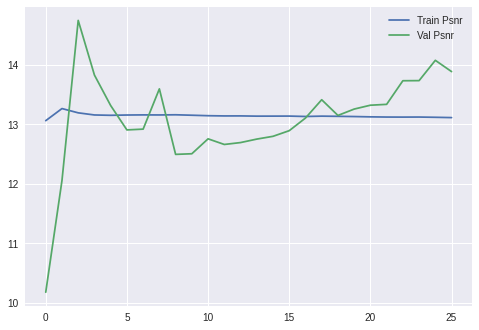

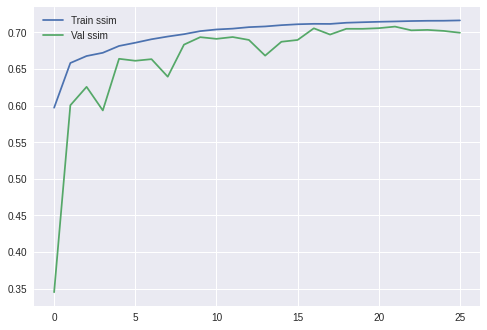

In [ ]:
plt.style.use('seaborn')
plt.plot(train_psnr,label="Train Psnr")
plt.plot(val_psnr, label="Val Psnr")
plt.legend()
plt.show()
plt.plot(train_ssim,label="Train ssim")
plt.plot(val_ssim, label="Val ssim")
plt.legend()
plt.show()

### Testing

In [ ]:
resDesModel.evaluate(datagen(testNoisy,testOriginal,batchSize=4),steps=25)

25/25 [==============================] - 5s 212ms/step - loss: 0.2830 - ssim_metric: 0.7170 - psnr: 12.5128 - mse: 0.0563


[0.28298047184944153,
 0.7170195579528809,
 12.512826919555664,
 0.05634824186563492]

In [ ]:
imgN = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testN/img0.jpeg",target_size=(224,224))
imgN = image.img_to_array(imgN)
imgN /= 255.0
imgN = np.expand_dims(imgN,axis=0)

In [ ]:
imgP1 = resDesModel.predict(imgN)

In [ ]:
img0 = image.load_img("/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/testO/img0.jpeg",target_size=(224,224))
img0 = image.img_to_array(img0)
img0 /= 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


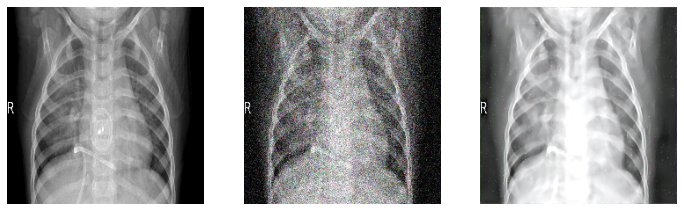

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(img0)
axs[2].imshow(imgP1[0])
axs[1].imshow(imgN[0])